In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from PIL import Image 
import os 
from scipy import ndimage as nd
from tkinter import Tcl
from poreUtils import *


from skimage.measure import label, regionprops, regionprops_table

from skimage.segmentation import watershed
from skimage.feature import peak_local_max


In [2]:
# Reading the original volume
scan_path = '1000-1300x1000-1300x2000-2300'
tiffs = os.listdir(scan_path)
slices = Tcl().call('lsort', '-dict', tiffs)

In [3]:
vol = np.empty(shape=(300, 300, 300), dtype=np.uint8)
for i, fname in enumerate(slices):
    im = Image.open(os.path.join(scan_path, fname))
    imarray = np.array(im)
    imarray = np.clip(imarray, 0.0005, 0.003)
    imarray = norm8bit(imarray)
    vol[i, :, :] = imarray

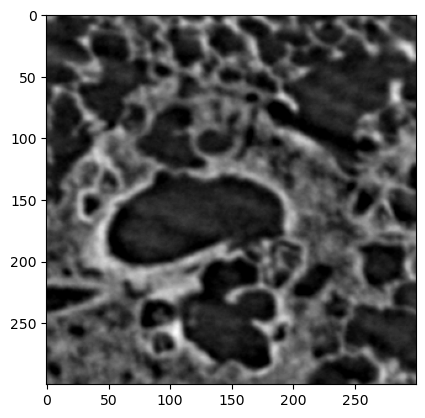

In [4]:
%matplotlib inline
plt.imshow(vol[100, :, :], cmap='gray')

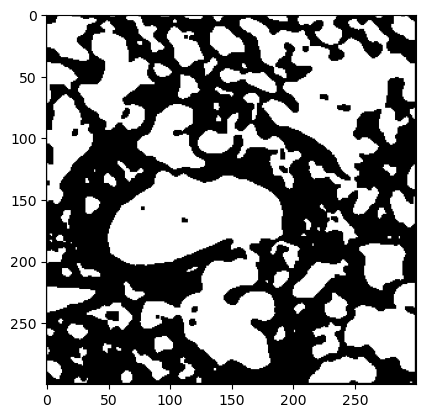

In [5]:
th_vol = vol < 55
th_vol = nd.binary_closing(th_vol, np.ones((3,3,3)))
th_vol = th_vol.astype(np.uint8)
plt.imshow(th_vol[100, :, :], cmap='gray')

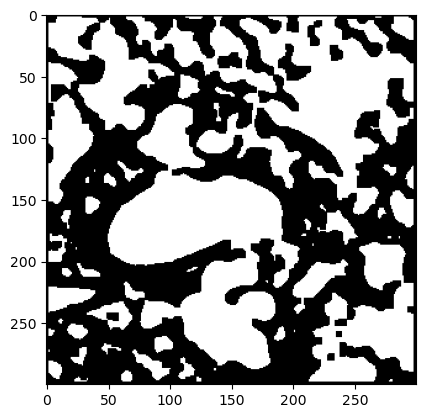

In [6]:
th_vol = nd.binary_dilation(th_vol, np.ones((5,5,5)))
th_vol = nd.binary_erosion(th_vol, np.ones((5,5,5)))
plt.imshow(th_vol[100, :, :], cmap='gray')

In [8]:
%matplotlib inline

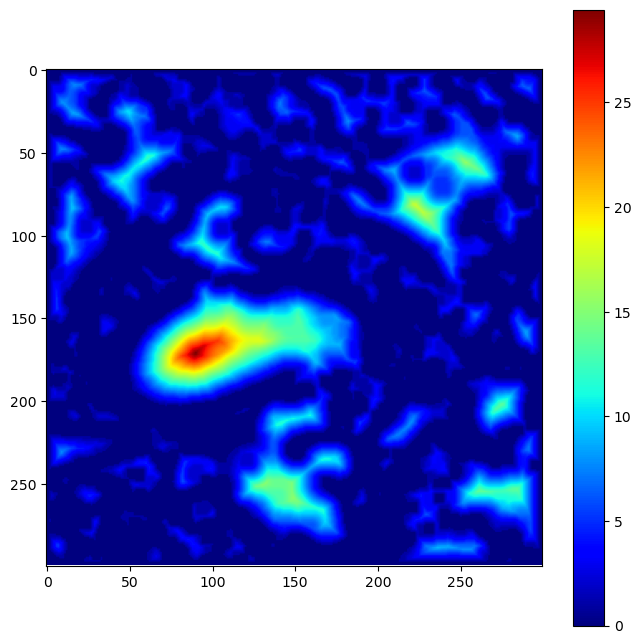

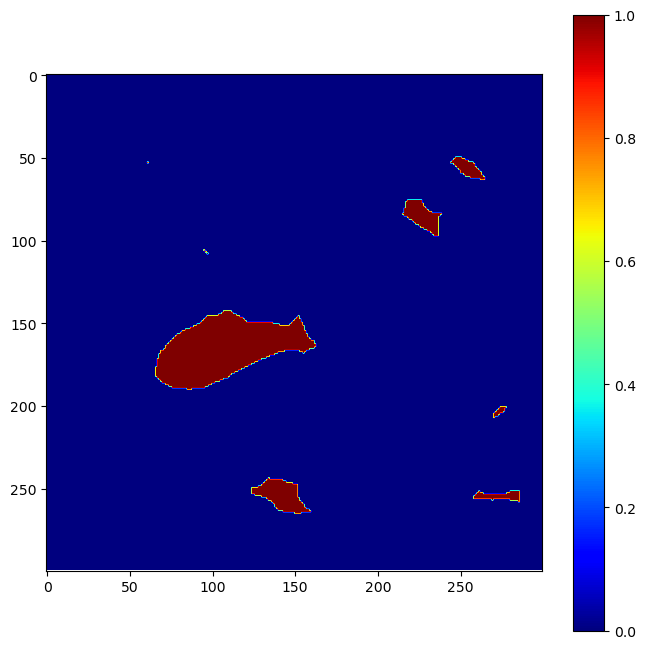

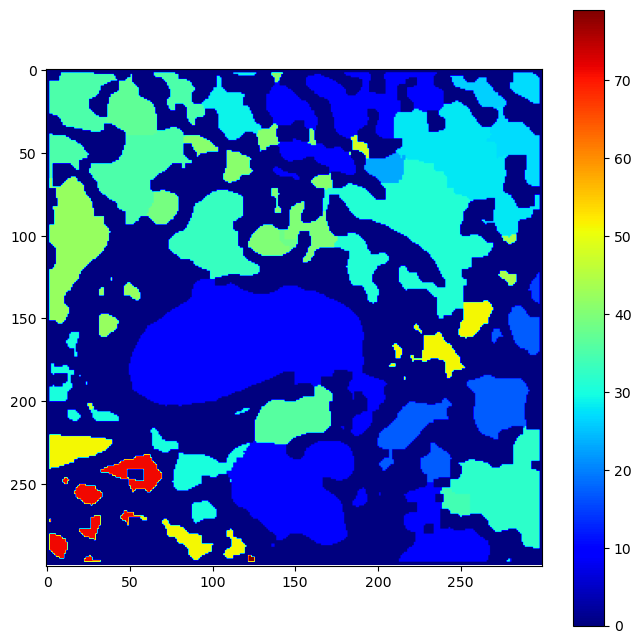

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129]


In [9]:
dt3d = nd.distance_transform_edt(th_vol)
# coords = peak_local_max(dt, footprint=np.ones((3, 3)), labels=th_img)
# mask = np.zeros(dt.shape, dtype=bool)
# mask[tuple(coords.T)] = True

mask = dt3d > 12
markers = label(mask)
labels = watershed(-dt3d, markers, mask=th_vol)

fig = plt.figure(figsize=(8,8))
plt.imshow(dt3d[100, :, :], cmap='jet')
plt.colorbar()
plt.show()


fig = plt.figure(figsize=(8,8))
plt.imshow(mask[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

fig = plt.figure(figsize=(8,8))
plt.imshow(labels[100, :, :], cmap='jet')
plt.colorbar()
plt.show()

print(np.unique(labels))

In [10]:
# Using porespy 
import porespy as ps
import scipy.ndimage as spim
ps.visualization.set_mpl_style()
np.random.seed(1)

/Users/mmrsagar/opt/anaconda3/envs/porespy/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
props = ps.metrics.regionprops_3D(labels)

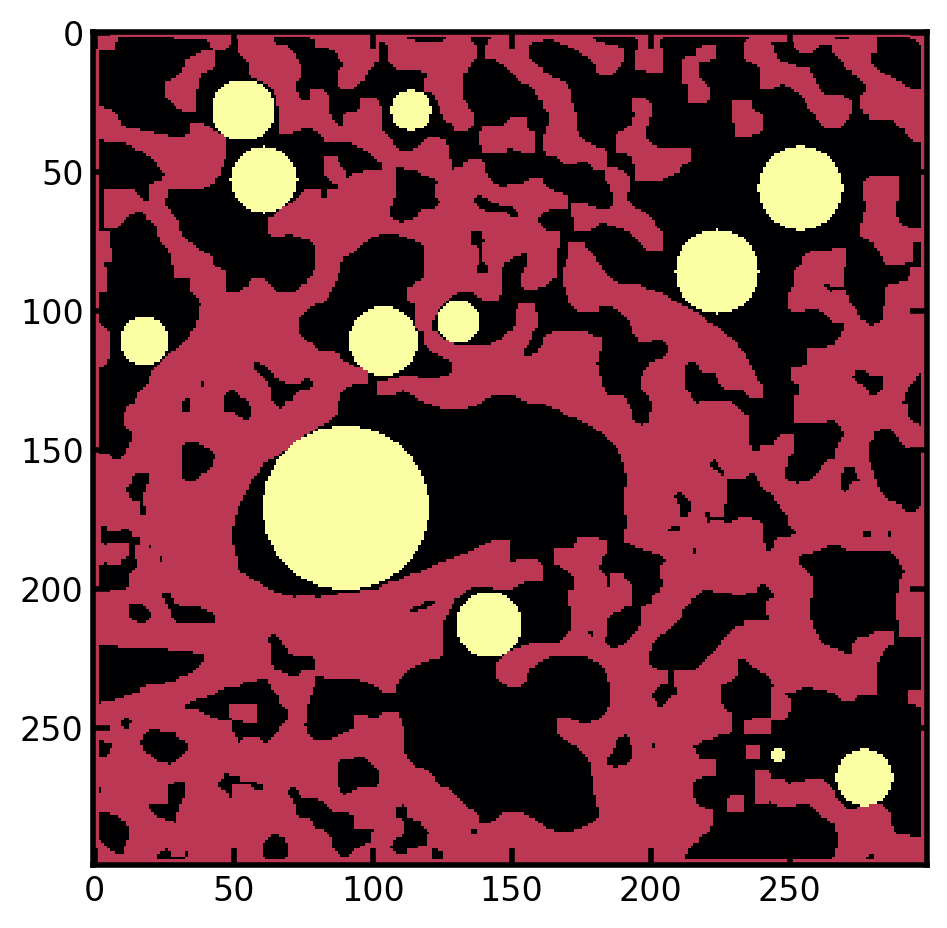

In [12]:
# Create an image of maximally inscribed spheres
sph = ps.metrics.prop_to_image(regionprops=props, shape=vol.shape, prop='inscribed_sphere')
fig, ax = plt.subplots()
ax.imshow(sph[100, :, :] + 0.5*(~th_vol[100, :, :]) , cmap=plt.cm.inferno);

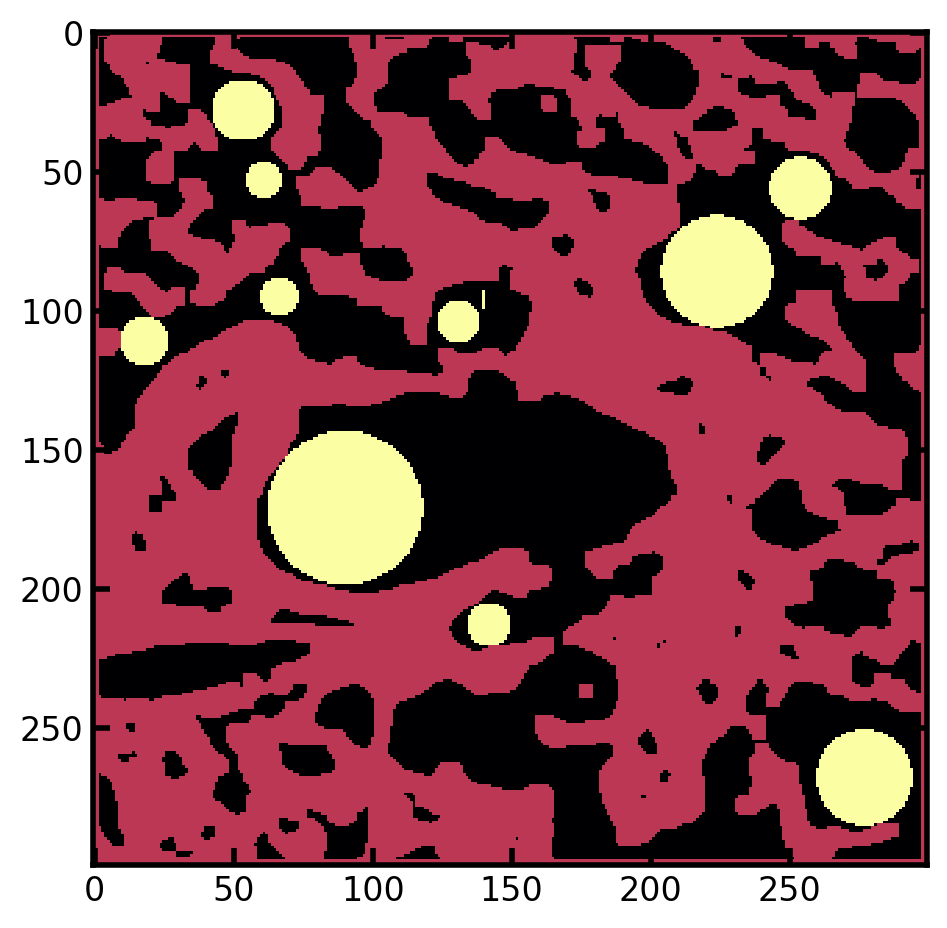

In [14]:
fig, ax = plt.subplots()
ax.imshow(sph[110, :, :] + 0.5*(~th_vol[110, :, :]) , cmap=plt.cm.inferno);

In [13]:
# takes long time at least for my macbook 
#df = ps.metrics.props_to_DataFrame(props[0:1])

In [14]:
#df

,label,volume,bbox_volume,sphericity,surface_area,convex_volume,area,area_bbox,area_convex,equivalent_diameter_area,euler_number,extent,feret_diameter_max,area_filled,axis_major_length,axis_minor_length,solidity
0,1,105814,597168,0.391214,27654.484375,262500,105814,597168,262500,58.683342,-3,0.177193,110.6752,105814,100.785547,47.120123,0.403101


In [37]:
r = props[10]

In [17]:
# to find out what are the available attributes  
attrs = [a for a in r.__dir__() if not a.startswith('_')]
print(attrs)

['label', 'slice', 'mask', 'slices', 'volume', 'bbox_volume', 'border', 'dt', 'inscribed_sphere', 'sphericity', 'skeleton', 'surface_area', 'surface_mesh_vertices', 'surface_mesh_simplices', 'convex_volume', 'area', 'bbox', 'area_bbox', 'centroid', 'area_convex', 'image_convex', 'coords', 'eccentricity', 'equivalent_diameter_area', 'euler_number', 'extent', 'feret_diameter_max', 'area_filled', 'image_filled', 'image', 'inertia_tensor', 'inertia_tensor_eigvals', 'image_intensity', 'centroid_local', 'intensity_max', 'intensity_mean', 'intensity_min', 'axis_major_length', 'axis_minor_length', 'moments', 'moments_central', 'moments_hu', 'moments_normalized', 'orientation', 'perimeter', 'perimeter_crofton', 'solidity', 'centroid_weighted', 'centroid_weighted_local', 'moments_weighted', 'moments_weighted_central', 'moments_weighted_hu', 'moments_weighted_normalized']


In [54]:
r.eccentricity

NotImplementedError: Property eccentricity is not implemented for 3D images

58.6833416932386


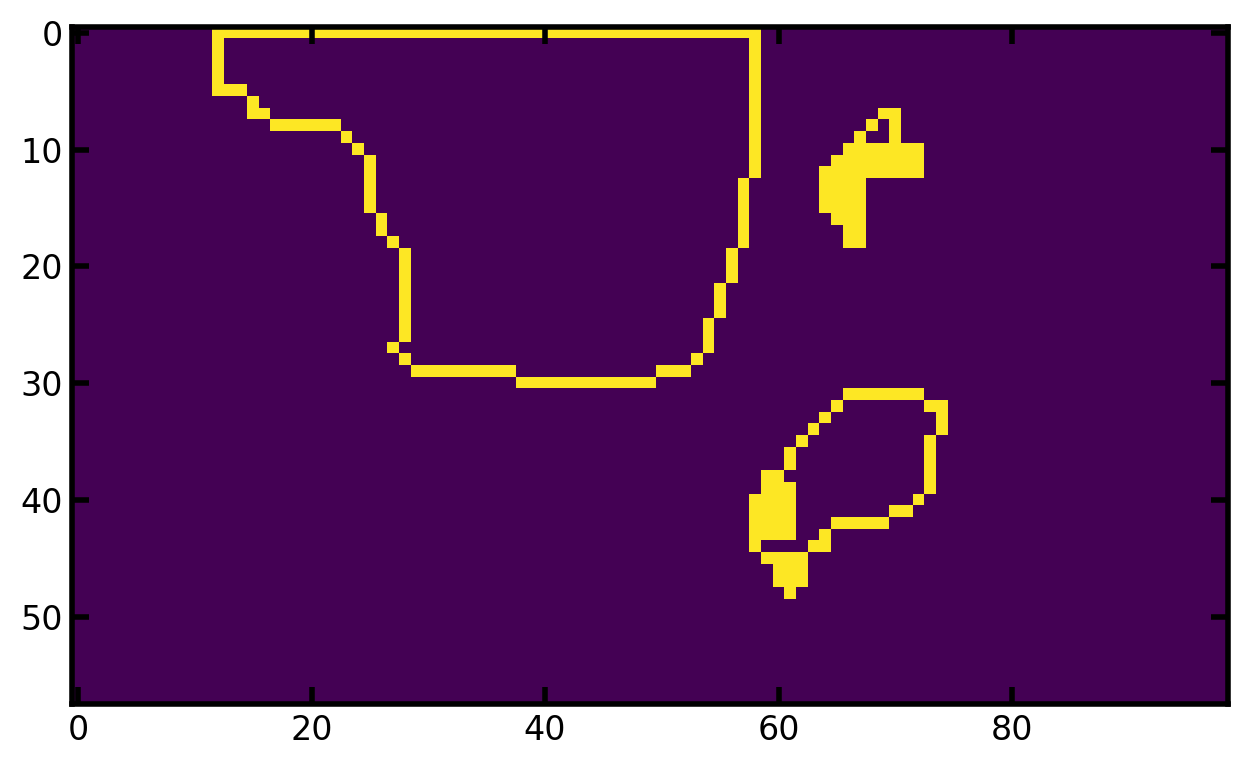

In [18]:
fig = plt.figure()
plt.imshow(r.border[:, :, 50],)

print(r.equivalent_diameter_area)

In [20]:
from mpl_toolkits.mplot3d import Axes3D
from skspatial.objects import Sphere
%matplotlib notebook 

<IPython.core.display.Javascript object>


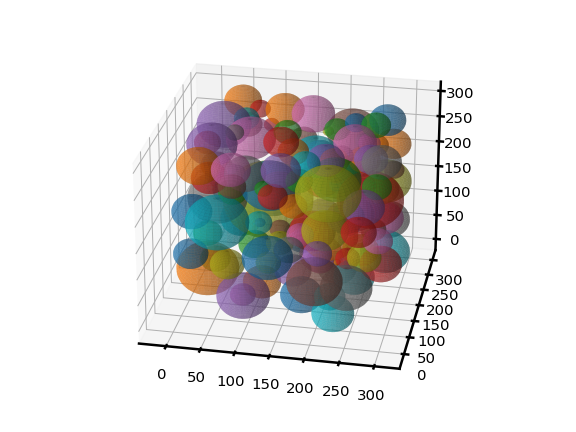

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for p in props:
    cord = p.centroid
    sph = Sphere(point=[cord[0], cord[1], cord[2]], radius=p.equivalent_diameter_area/2)
    sph.plot_3d(ax, alpha=0.5)
    #sph.point.plot_3d(ax, s=10)

In [ ]:
# extracting the 

xcor = []
ycor = []
zcor = []
volume = 

for p in props:
    cor = p.centroid
    xcor.append(cor[0])
    ycor.append(cor[1])
    zcor.append(cor[2])

In [31]:
props[0].label

1

In [30]:
props[0].slice

(slice(2, 60, None), slice(12, 111, None), slice(122, 226, None))

In [32]:
r.inscribed_sphere.shape

(58, 99, 104)

<IPython.core.display.Javascript object>


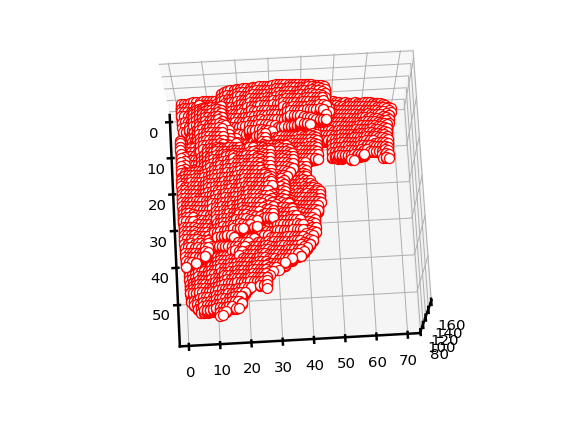

In [43]:
coords = r.coords
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for c in coords:
    ax.plot(c[0], c[1], c[2], 'ro')
    
plt.show()

In [ ]:
features = ['label', 'volume', 'bbox_volume', 'sphericity', 'surface_area', 'convex_volume',
            'centroid', 'equivalent_diameter_area', 'euler_number', 'extent',
            'axis_major_length', 'axis_minor_length', 'orientation', 'solidity']

In [59]:
df

,label,volume,bbox_volume,sphericity,surface_area,convex_volume,centroid,equivalent_diameter_area,euler_number,extent,axis_major_length,axis_minor_length,solidity
0,1,105814,597168,0.391214,27654.484375,262500,"(16.856975447483318, 59.64525488120665, 178.09...",58.683342,-3,0.177193,100.785547,47.120123,0.403101
1,2,405617,2421720,0.197037,134487.125000,1342395,"(32.79475465771898, 84.61819894136588, 54.9538...",91.841544,-92,0.167491,228.595926,83.859668,0.302159


In [63]:
import pandas as pd

# Create a list of properties
property_list = ['label', 'volume', 'bbox_volume', 'sphericity', 'surface_area', 'convex_volume',
                 'centroid', 'eccentricity', 'equivalent_diameter_area', 'euler_number', 'extent', 
                 'axis_major_length', 'axis_minor_length', 'orientation', 'solidity']

# Create a list to store the properties of each instance of r
data = []

# Iterate over each instance of r
for r_instance in props:
    # Create a dictionary to store the properties of the current instance of r
    properties = {}
    
    # Iterate over the property list
    for prop in property_list:
        try:
            # Extract the property from the current instance of r
            properties[prop] = getattr(r_instance, prop)
        except AttributeError:
            # If the property does not exist, set it to None
            properties[prop] = None
        except NotImplementedError:
            # If there is a NotImplementedError, set it to None and continue to the next iteration
            properties[prop] = None
            continue
        
    # Append the properties to the data list
    data.append(properties)

# Create a pandas dataframe from the data list
df = pd.DataFrame(data)


In [65]:
df

,label,volume,bbox_volume,sphericity,surface_area,convex_volume,centroid,eccentricity,equivalent_diameter_area,euler_number,extent,axis_major_length,axis_minor_length,orientation,solidity
0,1,105814,597168,0.391214,27654.484375,262500,"(16.856975447483318, 59.64525488120665, 178.09...",None,58.683342,-3,0.177193,100.785547,47.120123,None,0.403101
1,2,405617,2421720,0.197037,134487.125000,1342395,"(32.79475465771898, 84.61819894136588, 54.9538...",None,91.841544,-92,0.167491,228.595926,83.859668,None,0.302159
2,3,50712,132023,0.907540,7300.605469,65334,"(23.076687963401167, 174.73590077299258, 18.72...",None,45.923753,1,0.384115,60.306495,41.373191,None,0.776196
3,4,32705,109242,0.690565,7161.805176,48749,"(14.720012230545787, 172.33361871273505, 249.9...",None,39.676971,1,0.299381,62.186070,29.915400,None,0.670886
4,5,287162,1385824,0.503554,41801.230469,628609,"(24.96836628801861, 237.81265278832157, 252.40...",None,81.854542,-7,0.207214,154.989329,69.638188,None,0.456821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,125,61878,591668,0.401463,18844.990234,165870,"(263.6017647629206, 133.74053783250912, 263.42...",None,49.073370,0,0.104582,111.655320,35.751917,None,0.373051
125,126,14873,47120,0.578750,5053.496094,23318,"(284.85470315336516, 218.60055133463322, 200.2...",None,30.511717,1,0.315641,40.121769,25.639821,None,0.637833
126,127,41004,180544,0.489765,11741.238281,83713,"(285.845624817091, 64.81862745098039, 148.7086...",None,42.783456,0,0.227114,97.693728,31.653157,None,0.489816
127,128,98462,607662,0.560082,18411.041016,210497,"(280.7638886067722, 121.71125916597266, 266.32...",None,57.291476,1,0.162034,105.349210,50.121390,None,0.467760


In [ ]:
import pandas as pd

def extract_properties(list_of_r_instances):
    """
    Extract properties from a list of instances of 'r' and store them in a pandas dataframe.

    Parameters
    ----------
    list_of_r_instances : list
        List of instances of 'r'.

    Returns
    -------
    pandas.DataFrame
        Dataframe with columns for each property and rows for each instance of 'r'.
    """
    # Create a list of properties
    property_list = ['label', 'volume', 'bbox_volume', 'sphericity', 'surface_area', 'convex_volume',
                     'centroid', 'eccentricity', 'equivalent_diameter_area', 'euler_number', 'extent', 
                     'axis_major_length', 'axis_minor_length', 'orientation', 'solidity']

    # Create a list to store the properties of each instance of r
    data = []

    # Iterate over each instance of r
    for r_instance in list_of_r_instances:
        # Create a dictionary to store the properties of the current instance of r
        properties = {}

        # Iterate over the property list
        for prop in property_list:
            try:
                # Extract the property from the current instance of r
                properties[prop] = getattr(r_instance, prop)
            except AttributeError:
                # If the property does not exist, set it to None
                properties[prop] = None
            except NotImplementedError:
                # If there is a NotImplementedError, set it to None and continue to the next iteration
                properties[prop] = None
                continue

        # Append the properties to the data list
        data.append(properties)

    # Create a pandas dataframe from the data list
    df = pd.DataFrame(data)
    
    return df
